In [12]:
%pylab inline
import seaborn as sns; sns.set()

Populating the interactive namespace from numpy and matplotlib


# 1. Mini-batch KMeans 

KMeans算法的一种优化变种，采用小规模的数据子集来减少计算时间。

每次训练使用的数据集是在训练算法的时候**随机抽取的数据子集**，同时试图优化目标函数。

Mini Batch K-Means算法可以减少K-Means算法的收敛时间，而且产生的结果效果只是略差于标准K-Means算法。

算法步骤如下：

* 首先抽取部分数据集，使用K-Means算法构建出K个聚簇点的模型。
* 继续抽取训练数据集中的部分数据集样本数据，并将其添加到模型中，分配给距离最近的聚簇中心点。
* 更新聚簇的中心点值。
* 循环迭代第二步和第三步操作，直到中心点稳定或者达到迭代次数，停止计算操作。

In [2]:
from sklearn import datasets
from sklearn import cluster
import time
import scipy

X, y = datasets.make_blobs(1000000, centers = 8, random_state=0, cluster_std=1.5)

In [3]:
model = cluster.KMeans(8)

t1 = time.time()

y1 = model.fit_predict(X)

t2 = time.time()

print('time cost:  ', t2-t1, 'sec')

time cost:   32.861807107925415 sec


In [4]:
model = cluster.MiniBatchKMeans(8 )

t1 = time.time()

y2 = model.fit_predict(X)

t2 = time.time()

print('time cost:  ', t2-t1, 'sec')

time cost:   1.7896523475646973 sec


In [5]:
model = cluster.MiniBatchKMeans(8, batch_size=1000)

t1 = time.time()

y3 = model.fit_predict(X)

t2 = time.time()

print('time cost:  ', t2-t1, 'sec')

time cost:   1.142878770828247 sec


In [11]:
def cluster_plot(X, y, y_predict, ncenters, str1='True data', str2='KMeans clusters'):
    fig, axs = subplots(1,2, figsize=(14,6))
    axs[0].scatter(X[:,0], X[:,1], c=y, cmap='rainbow')

    labels = np.zeros_like(y_predict)
    used_labels = []
    for i in range(ncenters):
        rows = (y_predict == i)
        nowlab = scipy.stats.mode(y[rows])[0]
        while nowlab in used_labels:
            nowlab+= 1 
        labels[rows] = nowlab; used_labels.append(nowlab)
    axs[1].scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
    axs[0].set_title(str1, fontsize=16)
    axs[1].set_title(str2, fontsize=16)
    plt.show()

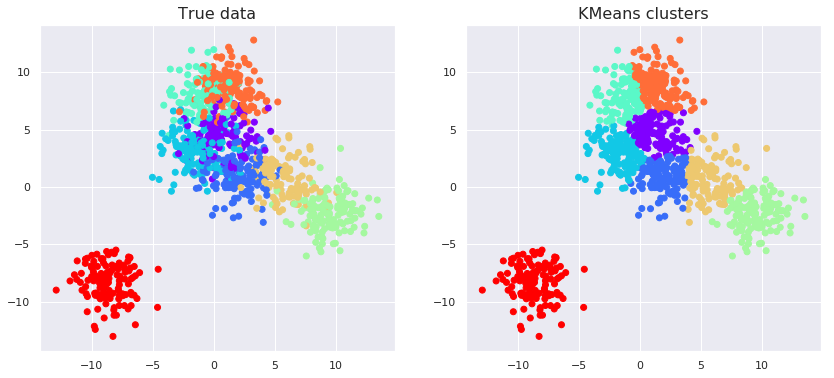

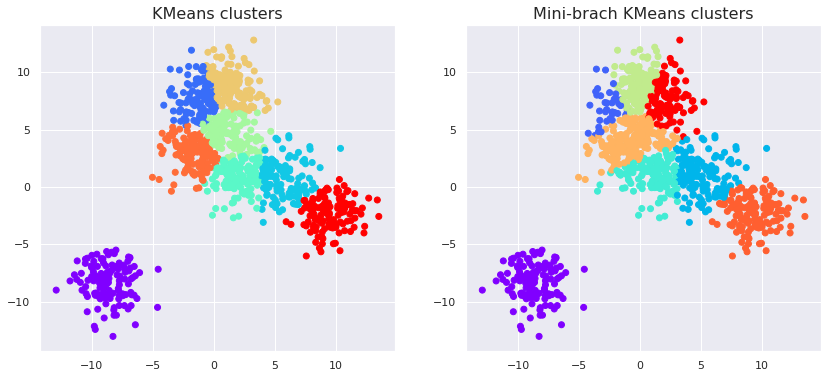

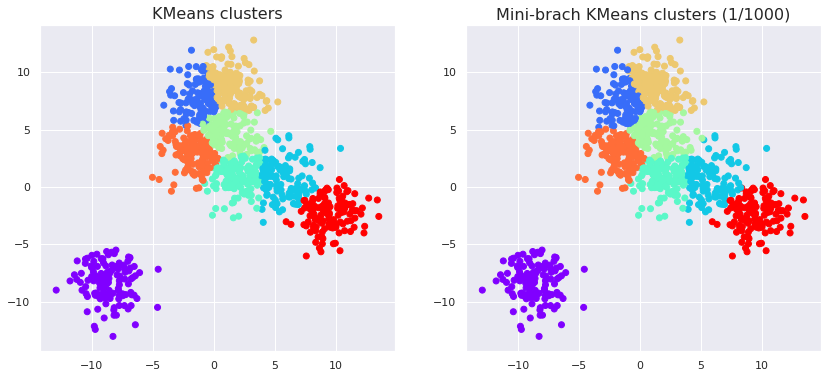

In [7]:
cluster_plot(X[:1000], y[:1000], y1[:1000], 8, )
cluster_plot(X[:1000], y1[:1000], y2[:1000], 8, 'KMeans clusters', 'Mini-brach KMeans clusters')
cluster_plot(X[:1000], y1[:1000], y3[:1000], 8, 'KMeans clusters', 'Mini-brach KMeans clusters (1/1000)')

## 评估 

In [8]:
from sklearn import model_selection, metrics
print(metrics.adjusted_mutual_info_score(y, y1), 
      metrics.adjusted_mutual_info_score(y, y2), 
      metrics.adjusted_mutual_info_score(y, y3))

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.6918169175047271 0.6512859713315278 0.6905305131025012


In [9]:
print(metrics.adjusted_rand_score(y, y1), 
        metrics.adjusted_rand_score(y, y2), 
      metrics.adjusted_rand_score(y, y3))

0.6279100086615846 0.5429857237722393 0.626165625036884


# 3.2 MeanShift

Mean-shift（即：均值迁移）的基本思想：

* 在数据集中选定一个点

* 然后以这个点为圆心，$r$ 为半径，画一个圆(二维下是圆)

* 求出这个点到所有点的向量的平均值，而圆心与向量均值的和为新的圆心

* 迭代此过程，直到满足一点的条件结束。(Fukunage在1975年提出)



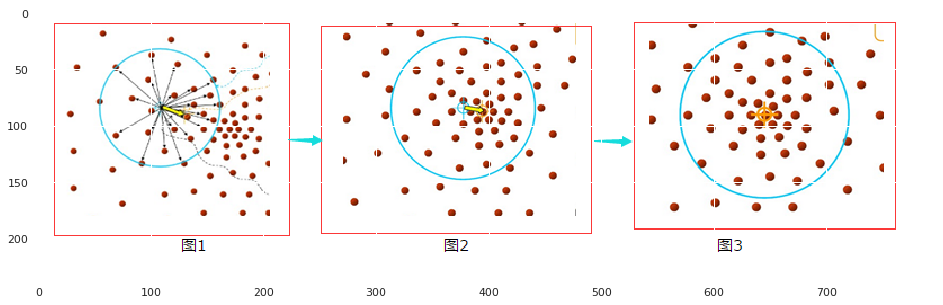

In [3]:
fig, ax = subplots(figsize=(16,8))

ax.imshow(imread('./meanshift1.png'))

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


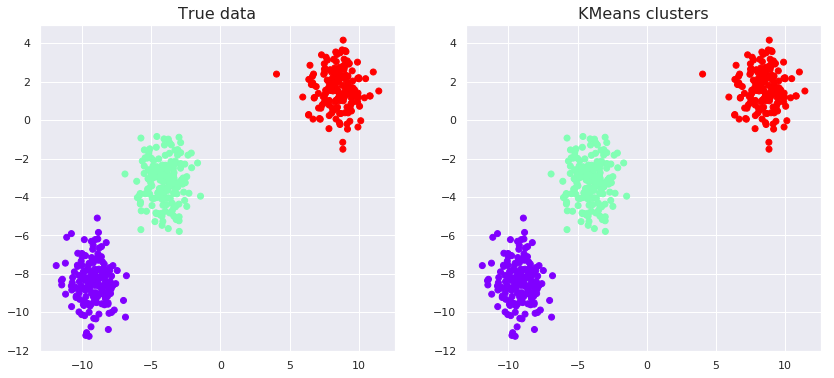

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


1.0

In [36]:
from sklearn import cluster

model = cluster.MeanShift()

X, y = datasets.make_blobs(500, centers=3)

model.fit(X)

cluster_plot(X, y, model.predict(X), 10)

metrics.adjusted_mutual_info_score(y, model.predict(X))

#### Meanshift 会自然收敛在“中心”位置。下图演示了收敛的过程。

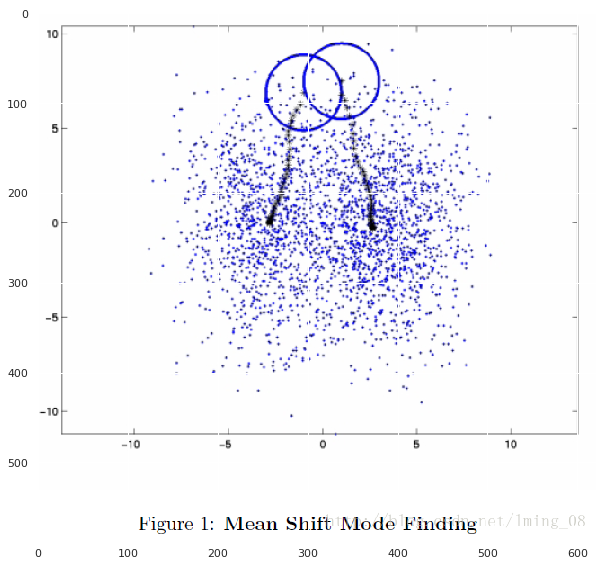

In [6]:
fig, ax = subplots(figsize=(10,12))

ax.imshow(imread('./meanshift2.png'))

#### 数学形式

如果当前位置为 $x$，以该点为中心的圆圈中间的点集为 $S$，那么新的**中心点**为

$\frac{1}{n_S}\sum _{x_i \in S} (x_i )$

改进的 Mean shift 往往加一个 **核函数**，那么新的中心为

$\frac{ \sum _{x_i \in S} x_i K(x_i-x)}{\sum _{x_i \in S} K(x_i-x)}$

核函数的定义使得偏移值对偏移向量的贡献随之样本与被偏移点的距离的不同而不同。

核函数也使得 Meanshift 功能更加强大（原因...你懂的）。

#### Meanshift 用于目标跟踪

Mean Shift算法最常用于目标跟踪。

它通过**计算候选目标与目标模板之间相似度的概率密度分布**，然后利用**概率密度梯度下降的方向**来获取匹配搜索的最佳路径，加速运动目标的定位和降低搜索的时间，在目标实时跟踪领域有着很高的应用价值。

其优点是：

* 采用了统计特征，因此对噪声有很强的鲁棒性(robustness，这个翻译很暴力...）；
* 是一个单参数算法，容易作为一个模块和别的算法集成；
* 采用核函数直方图建模，对边缘阻挡、目标的旋转、变形以及背景运动都不敏感；
* 本质是最陡下降法，因此其寻优过程收敛速度快，使得该算法具有很好的实时性。

缺点是：

    缺乏必要的模板更新；
    跟踪过程中由于窗口宽度大小保持不变，当目标尺度有所变化时，跟踪就会失败；
    当目标速度较快时，跟踪效果不好；
    直方图特征在目标颜色特征描述方面略显匮乏，缺少空间信息.


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


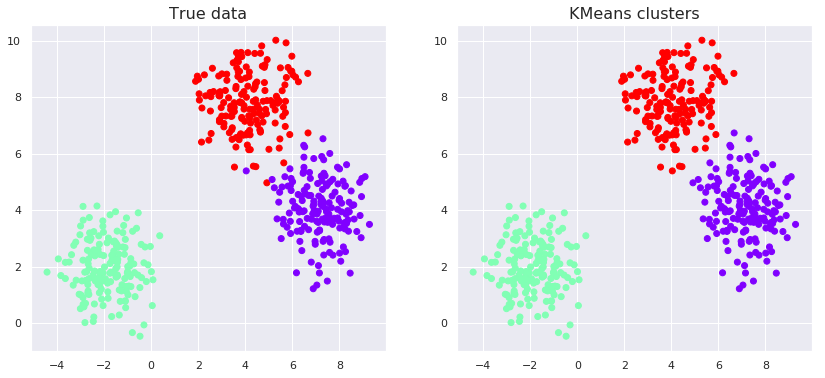

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.9613299084020662

In [47]:
from sklearn import cluster, metrics

X, y = datasets.make_blobs(500, centers=3)

model = cluster.MeanShift()

model.fit(X)

cluster_plot(X, y, model.predict(X), 10)

metrics.adjusted_mutual_info_score(y, model.predict(X))

### 缺点

我们介绍了 KMeans, Mini batch KMeans， Mean shift。它们都有一个缺点：
    

* **如果数据集的分布簇不是类似于超球体，或者说不是凸的，则聚类效果不好。**

# 作业：

    测试 KMeans, Mini brach KMeans, Meanshift 在以下数据集的表现：
        
        iris
        
        datasets.make_blobs(500, centers=3, cluster_std=0.3, random_state=0)

        datasets.make_circles(500, factor=0.5, noise=0.05, random_state=0)

        datasets.make_circles(500, factor=0.5, noise=0.1, random_state=0)
        
    请做到：
    
        计算 adjusted_rand_score，adjusted_mutual_info_score，轮廓系数, 评估其好坏
        
        对 X 是2维的情况，绘制 原始数据、cluster 结果的点图，观察 其表现

In [100]:
def ml_cluster_compare(X,y, title='', n_clusters=3):
    rlts = []
    labels = []
    
    for model, label in [  
        
            [cluster.KMeans( n_clusters=n_clusters), 'KMeans'],
            [cluster.MiniBatchKMeans(n_clusters=n_clusters), 'MiniBatch KMeans'],
            [cluster.MeanShift(), 'Mean Shift'],
        ]:
    
        model.fit(X)

        cluster_plot(X, y, model.predict(X), 10, str2=label)
        
        print('ARI, AMI, Silihouette = \n\t', metrics.adjusted_rand_score(y, model.predict(X)), \
                  metrics.adjusted_mutual_info_score(y, model.predict(X)), \
                metrics.silhouette_score(X, model.predict(X)))

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


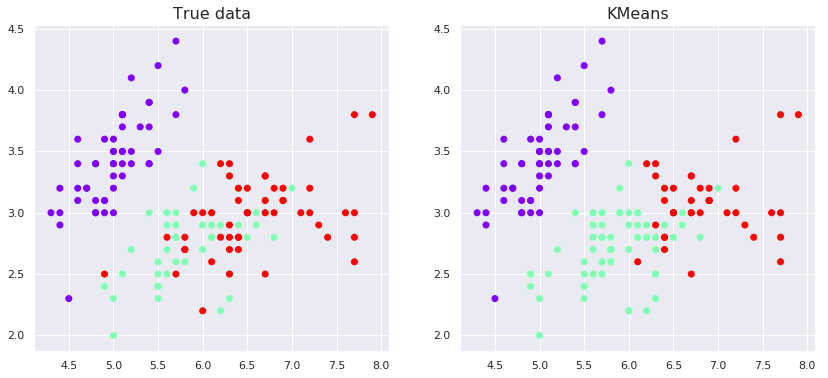

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


ARI, AMI, Silihouette = 
	 0.7302382722834697 0.7483723933229484 0.5528190123564091


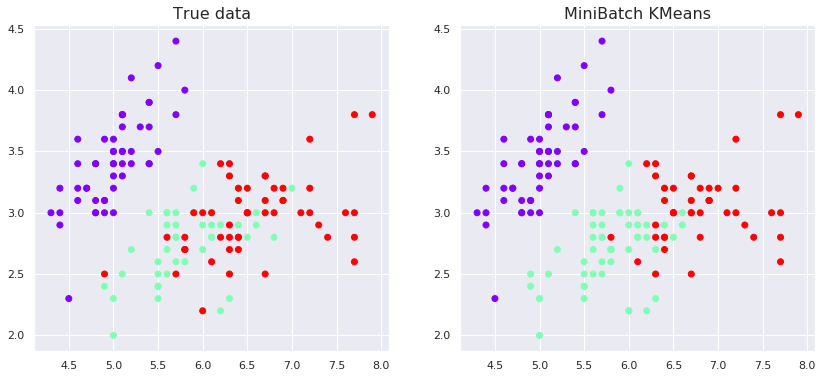

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


ARI, AMI, Silihouette = 
	 0.7424064303816006 0.7464455856886966 0.5412333572227851


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


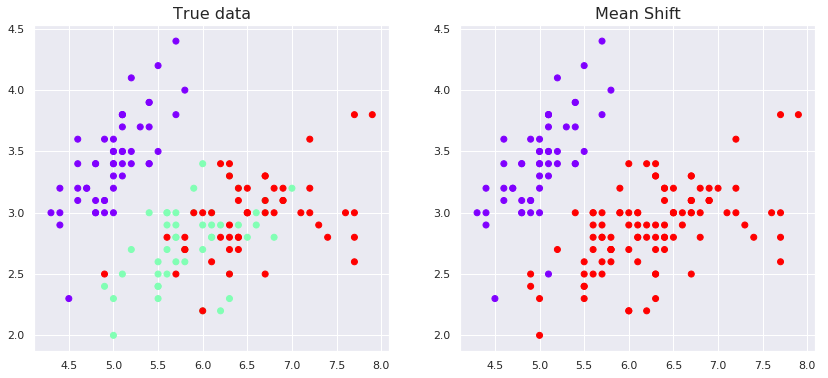

ARI, AMI, Silihouette = 
	 0.5583714437541352 0.5509814129042337 0.685788171261719


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [86]:
iris = datasets.load_iris()

X, y = iris.data, iris.target

ml_cluster_compare(X, y, )

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


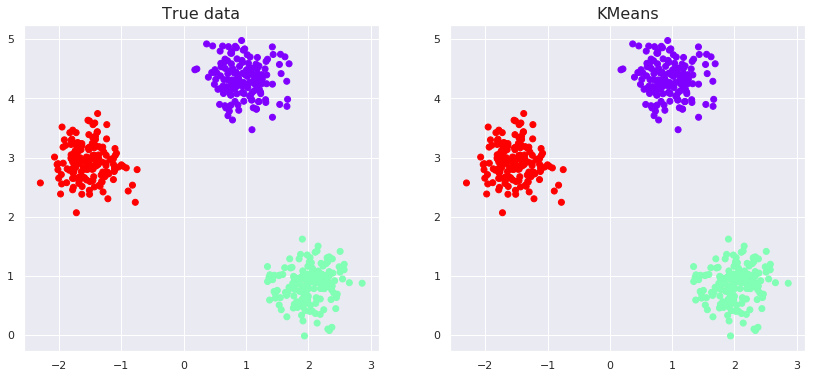

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


ARI, AMI, Silihouette = 
	 1.0 1.0 0.8301967959309895


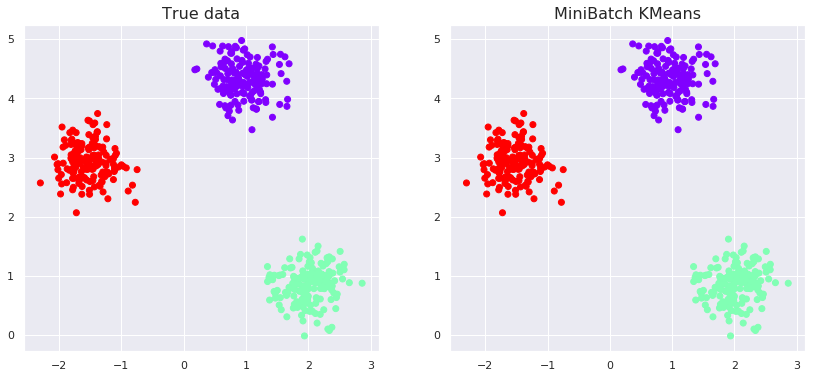

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


ARI, AMI, Silihouette = 
	 1.0 1.0 0.8301967959309895


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


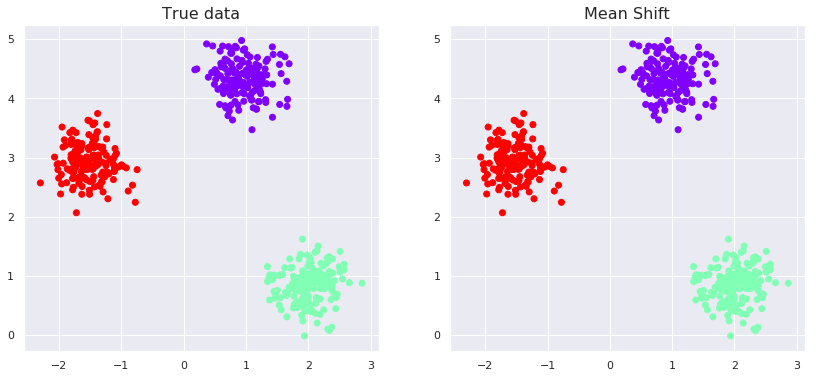

ARI, AMI, Silihouette = 
	 1.0 1.0 0.8301967959309895


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [85]:
X, y = datasets.make_blobs(500, centers=3, cluster_std=0.3, random_state=0)

ml_cluster_compare(X, y, )

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


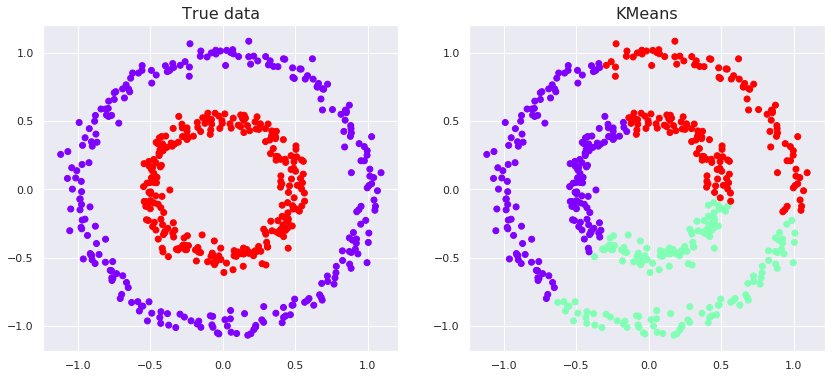

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


ARI, AMI, Silihouette = 
	 -0.0024702791525395133 -0.0016903288634889993 0.3896956778002782


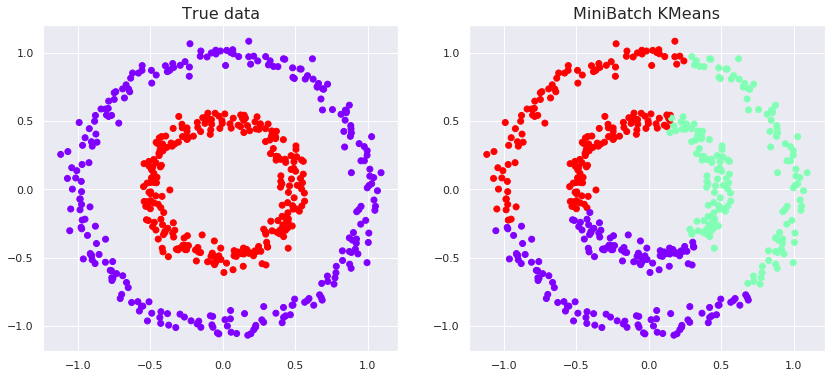

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


ARI, AMI, Silihouette = 
	 -0.0017636202903910084 -0.0011999222412843941 0.38881392136053106


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


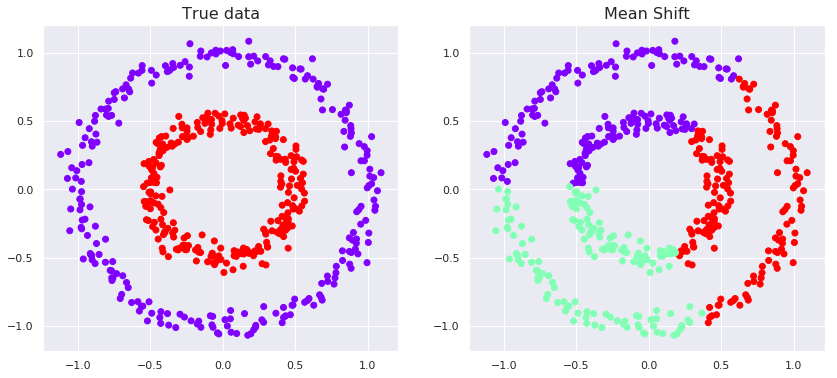

ARI, AMI, Silihouette = 
	 -0.002533934894244036 -0.0017326815516707469 0.38585014462858


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [93]:
X, y = datasets.make_circles(500, factor=0.5, noise=0.05, random_state=0)

ml_cluster_compare(X, y, )

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


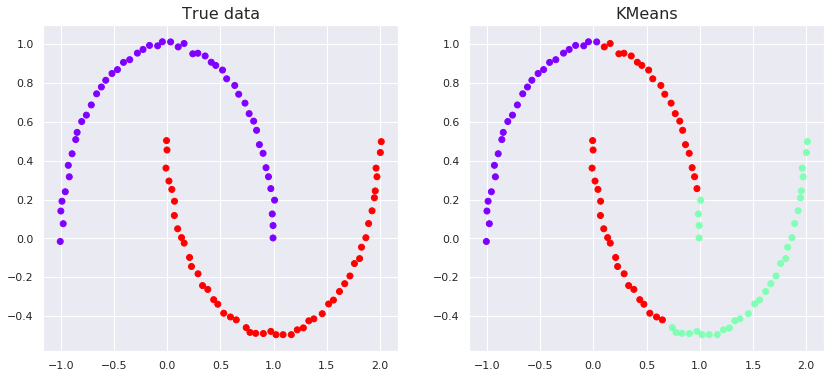

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


ARI, AMI, Silihouette = 
	 0.2605889867985718 0.2632187739636322 0.41288974360049446


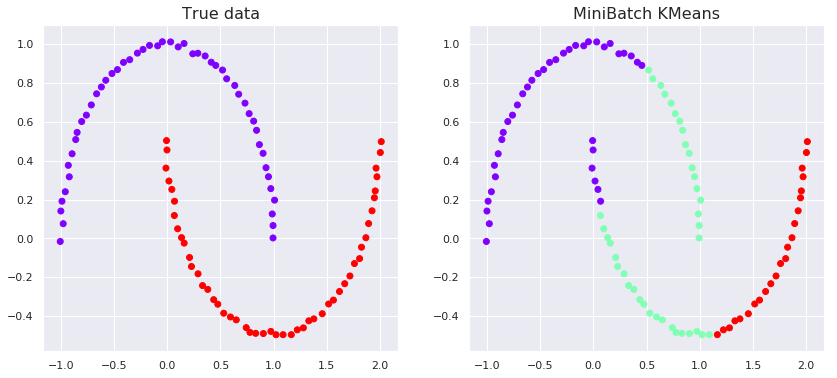

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


ARI, AMI, Silihouette = 
	 0.24487506499568057 0.23920157521183277 0.41707675902878316


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


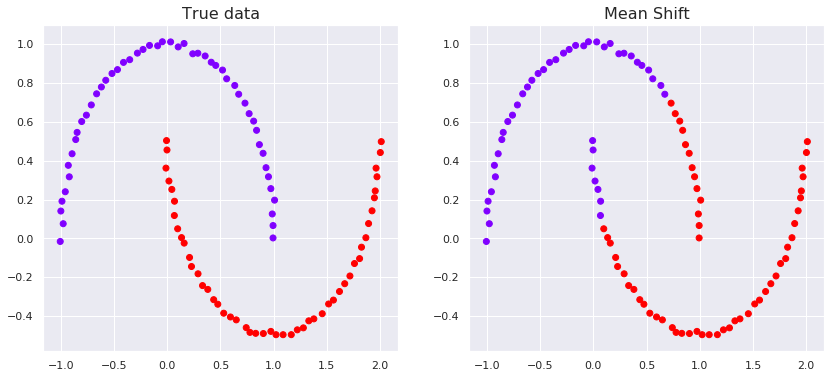

ARI, AMI, Silihouette = 
	 0.3535643742144012 0.27881156466673473 0.4760302299365469


/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [99]:
X, y = datasets.make_circles(500, factor=0.5, noise=0.1, random_state=0)

ml_cluster_compare(X, y, )

ml_cluster_compare(X, y, )